In [73]:
import os
import sys
import time
from IPython.display import display

project_path = os.getcwd()
sys.path.insert(0, project_path)

# Set the path for objective function
objective_path = os.path.join(project_path, '9in_10out')
sys.path.insert(0, objective_path)

import numpy as np
import pandas as pd
import torch
from nextorch import plotting, bo, doe, utils, io, parameter
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

In [74]:
# CSV to DataFrame
input_data = pd.read_csv('compound_data')
# Selection of compounds and removal of SMILES column
input_data = input_data.iloc[:,1:]
# Conversion to Numpy array
input_data_array = input_data.to_numpy()

In [75]:
##%% Initialize a multi-objective Experiment object
# Set its name, the files will be saved under the folder with the same name
Exp_9_10 = bo.EHVIMOOExperiment('mice_9_10_open')  

# Set the type and range for each parameter
par_mw = parameter.Parameter(x_type = 'continuous', x_range=[20,1000])
par_logP = parameter.Parameter(x_type = 'continuous', x_range=[-10,10])
par_hbd = parameter.Parameter(x_type = 'ordinal', x_range=[0,15], interval=1)
par_hba = parameter.Parameter(x_type = 'ordinal', x_range=[0,20], interval=1)
par_tpsa = parameter.Parameter(x_type = 'continuous', x_range=[0,3000])
par_mr = parameter.Parameter(x_type = 'continuous', x_range=[20,150])
par_rb = parameter.Parameter(x_type = 'ordinal', x_range=[0,15], interval=1)
par_ar = parameter.Parameter(x_type = 'ordinal', x_range=[0,10], interval=1)
par_ha = parameter.Parameter(x_type = 'ordinal', x_range=[1,100], interval=1)

parameters = [par_mw, par_logP, par_hbd, par_hba, par_tpsa, par_mr, par_rb, par_ar, par_ha]
Exp_9_10.define_space(parameters)

In [76]:
import biomarker_functions as bi

# Choose whether to standardize output (using data from LHC sample)
stand_flag = False

if stand_flag:
    X_unit = doe.latin_hypercube(n_dim = 9, n_points = 500, seed = 1)
    X_real = utils.encode_to_real_ParameterSpace(X_unit, Exp_9_10.parameter_space)
    Y = bi.compute_biomarkers(X_real)
    bio_mean = pd.DataFrame(Y).mean().to_list()
    bio_std = pd.DataFrame(Y).std().to_list()
    objective_func = lambda X: (bi.compute_biomarkers(X) - bio_mean) / bio_std
else:
    objective_func = bi.compute_biomarkers

# Define the design space
X_name_list = [
    "Molecular Weight",
    "LogP",
    "Hydrogen Bond Donors",
    "Hydrogen Bond Acceptors",
    "Topological Polar Surface Area",
    "Molar Refractivity",
    "Rotatable Bonds",
    "Aromatic Rings",
    "Heavy Atoms"
]
    
Y_name_list = [
    "Inflammatory Response",
    "Oxidative Stress",
    "Neuroprotection",
    "Mitochondrial Function",
    "Synaptic Function",
    "Motor Function",
    "Cognitive Function",
    "Cardiac Function",
    "Liver Function",
    "Kidney Function"
]

var_names = X_name_list + Y_name_list

In [83]:
res1 = pd.DataFrame(objective_func(input_data_array))
res1

,0,1,2,3,4,5,6,7,8,9
0,7.879423,10.031085,3.213971,6.814252,0.203115,2.323316,1.821381,4.351205,1.623387,1.598674
1,9.380492,10.936041,4.213374,0.446681,1.922277,1.524965,3.991077,4.590415,2.150635,0.239514
2,8.959259,10.428918,4.037451,0.883102,1.675887,2.150993,3.886391,4.500410,2.057444,0.582765
3,10.132795,10.599480,4.146985,1.166917,1.372898,2.607267,3.809294,4.614458,2.231655,0.790249
4,18.528784,21.732820,6.932246,0.721239,2.762878,2.519135,2.630743,7.307686,3.444490,1.305473
5,6.524658,8.498569,2.708498,5.566549,0.255677,0.263176,0.906158,3.891143,1.334105,0.822783
6,14.664777,16.119595,5.525494,1.308574,1.596806,-0.450896,3.529102,5.982612,2.857779,1.055425
7,8.359690,8.895670,3.618544,0.454953,1.629582,2.020954,3.650594,4.080806,1.856203,0.190830
8,7.813874,9.783067,3.293452,1.171156,0.733568,1.842324,1.759076,4.208662,1.724404,0.548419
9,5.474692,6.695855,2.603341,1.321198,0.897446,-0.104812,2.123996,3.504825,1.458270,1.064153


In [88]:
res1[(res1.iloc[:,0]>5) & (res1.iloc[:,1]>10) & (res1.iloc[:,2]>4) & (res1.iloc[:,3]>1) & (res1.iloc[:,4]>1) & (res1.iloc[:,5]>1) & (res1.iloc[:,6]>1.5) & (res1.iloc[:,7]>5) & (res1.iloc[:,8]>2) & (res1.iloc[:,9]>1)]

,0,1,2,3,4,5,6,7,8,9
17,10.519280,13.346242,4.569499,2.149449,1.232981,2.735004,3.536652,5.166937,2.556703,1.711285
26,18.086485,21.059261,6.760412,1.145732,2.520397,3.144842,2.565041,7.220259,3.333898,1.589622
41,15.051457,18.172702,5.939171,2.026132,1.614319,1.134392,2.756610,6.532029,3.174420,1.874501


In [48]:
# Get the information of the design space
n_dim = len(X_name_list) # the dimension of inputs
n_objective = len(Y_name_list) # the dimension of outputs

##%% Initial Sampling 
# Latin hypercube design
n_init = 50
X_init = doe.latin_hypercube(n_dim = n_dim, n_points = n_init)
# Get the initial responses
Y_init = bo.eval_objective_func_encoding(X_init, Exp_9_10.parameter_space, objective_func)

# Import the initial data
Exp_9_10.input_data(X_init, 
                   Y_init, 
                   X_names = X_name_list,
                   Y_names = Y_name_list,
                   unit_flag = True,
                   standardized = stand_flag)

# Set the optimization specifications 
if stand_flag:
    ref_point = [-3.0]*10
else:
    ref_point = [5,5,3,0,0,0,1,3,1,0.5]

# Set a timer
start_time = time.time()
Exp_9_10.set_ref_point(ref_point)
Exp_9_10.set_optim_specs(objective_func = objective_func, 
                        maximize = True)
end_time = time.time()
print('Initializing the experiment takes {:.2f} minutes.'.format((end_time-start_time)/60))

Iter 10/100: 24.429370880126953
Iter 20/100: 20.70830726623535
Iter 30/100: 20.167991638183594
Iter 40/100: 19.66358184814453
Iter 50/100: 19.419254302978516
Iter 60/100: 19.362659454345703
Iter 70/100: 19.35943603515625
Initializing the experiment takes 0.00 minutes.


In [49]:
# Number of iterations for each experiment
n_trials = 100

start_time = time.time()

for i in range(n_trials):
    if i%20 == 0:
        print("{} trials completed".format(i))
    # Generate the next experiment point
    X_new, X_new_real, acq_func = Exp_9_10.generate_next_point(n_candidates=1)
    # Get the response at this point
    Y_new_real = objective_func(X_new_real)
    # Retrain the model by input the next point into Exp object
    Exp_9_10.run_trial(X_new, X_new_real, Y_new_real)

end_time = time.time()
print('Running the trials takes {:.2f} minutes.'.format((end_time-start_time)/60))

0 trials completed
Iter 10/100: 19.19169807434082
Iter 20/100: 19.185808181762695
Iter 10/100: 19.048545837402344
Iter 10/100: 18.849964141845703
Iter 20/100: 18.83884048461914
Iter 30/100: 18.835857391357422
Iter 10/100: 18.782814025878906
Iter 20/100: 18.767215728759766
Iter 30/100: 18.762840270996094
Iter 10/100: 18.677263259887695
Iter 10/100: 18.52471160888672
Iter 20/100: 18.518003463745117
Iter 10/100: 18.51121711730957
Iter 10/100: 18.344221115112305
Iter 20/100: 18.332731246948242
Iter 30/100: 18.33100128173828
Iter 10/100: 18.241662979125977
Iter 10/100: 18.06623077392578
Iter 20/100: 18.04901885986328
Iter 30/100: 18.0440616607666
Iter 10/100: 17.981409072875977
Iter 10/100: 17.823659896850586
Iter 10/100: 17.73865509033203
Iter 10/100: 17.70702362060547
Iter 10/100: 17.614171981811523
Iter 10/100: 17.49320411682129
Iter 10/100: 17.36617660522461
Iter 10/100: 17.290884017944336
Iter 10/100: 17.16644287109375
Iter 10/100: 17.230798721313477
20 trials completed
Iter 10/100: 17

In [72]:
# Results:
from botorch.utils.multi_objective.hypervolume import Hypervolume
sample_size = Exp_9_10.Y_real.shape[0]
front_size = Exp_9_10.get_optim()[0].shape[0]

Y_optim_stand = utils.standardize_X(Exp_9_10.get_optim()[0], X_mean=Exp_9_10.Y_mean, X_std=Exp_9_10.Y_std)
ref_point_stand = utils.standardize_X(ref_point, X_mean=Exp_9_10.Y_mean, X_std=Exp_9_10.Y_std)

final_hypervolume_obj = Hypervolume(ref_point_stand)
final_hypervolume = final_hypervolume_obj.compute(Y_optim_stand)
print('Out of {} points sampled, {} are on the Pareto front ({:.1%}).'.format(sample_size, front_size, front_size/sample_size))
print('The (standardized) hypervolume is {:.0f}.'.format(final_hypervolume))
# If wanted non-standardized hypervolume: print(final_hypervolume*Exp_9_10.Y_std.numpy().prod())

KeyboardInterrupt: 

In [65]:
# # Results: (non-standardized version - can also simply be obtained by multiplying standardized HV by stdevs, as seen above)
# from botorch.utils.multi_objective.hypervolume import Hypervolume
# sample_size = Exp_9_10.Y_real.shape[0]
# front_size = Exp_9_10.get_optim()[0].shape[0]
# final_hypervolume_obj = Hypervolume(torch.tensor(ref_point))
# final_hypervolume = final_hypervolume_obj.compute(torch.from_numpy(Exp_9_10.get_optim()[0]))
# print('Out of {} points sampled, {} are on the Pareto front ({:.1%}).'.format(sample_size, front_size, front_size/sample_size))
# print('The hypervolume is {:.0f}.'.format(final_hypervolume))

,Molecular Weight,LogP,Hydrogen Bond Donors,Hydrogen Bond Acceptors,Topological Polar Surface Area,Molar Refractivity,Rotatable Bonds,Aromatic Rings,Heavy Atoms,Inflammatory Response,Oxidative Stress,Neuroprotection,Mitochondrial Function,Synaptic Function,Motor Function,Cognitive Function,Cardiac Function,Liver Function,Kidney Function
0,583.459035,-3.826723,4.0,12.0,1960.886849,138.040974,10.0,8.0,38.0,25.642889,25.697565,8.814784,-0.028647,10.719526,-2.432098,17.222713,8.532739,6.147253,-0.356314
1,83.761728,-9.125081,12.0,19.0,2165.644952,84.340944,10.0,6.0,99.0,20.362352,17.757547,6.866275,-1.205594,13.872814,-1.238374,-4.120934,6.195235,0.113671,-0.655259
2,823.955395,-9.585032,7.0,10.0,1984.863719,104.959871,5.0,8.0,60.0,19.875462,19.865852,7.614017,-0.167157,11.919631,3.151023,-5.75427,7.353806,8.08992,-0.491729
3,908.871772,2.962311,12.0,9.0,2897.9187,39.940272,0.0,6.0,46.0,0.589477,6.602477,4.446385,1.407098,12.805589,-0.37838,25.254244,4.011598,9.834471,1.923971
4,241.182034,-2.128183,14.0,9.0,647.528757,147.989067,11.0,0.0,33.0,26.488274,28.673355,9.229592,-0.277887,6.923935,-0.347815,13.129981,8.810439,2.842708,-0.339734
5,364.432523,-4.282097,2.0,8.0,2604.987995,146.192312,15.0,5.0,94.0,27.561384,29.14991,9.269411,-0.73428,13.249281,3.313466,18.297392,9.251257,2.296186,-0.572238
6,993.134117,3.8365,7.0,16.0,1206.706624,43.728199,5.0,3.0,3.0,5.430809,6.432766,4.050194,0.282424,8.209669,1.42828,13.349499,3.590269,11.059854,1.282596
7,504.048303,-1.205521,0.0,20.0,2858.640922,71.273874,8.0,9.0,73.0,15.677755,14.133957,5.621692,-0.140653,12.375289,3.323345,27.004839,5.48065,3.962018,-0.672152
8,312.649983,-7.867181,2.0,17.0,1835.872985,122.394175,13.0,2.0,89.0,28.386236,25.239498,8.271886,-0.844382,11.227155,-0.600893,1.530654,8.020068,1.906435,-1.082924
9,272.839982,0.688684,6.0,2.0,2405.586587,133.162973,11.0,4.0,74.0,20.086548,26.164724,8.453446,-0.35238,12.175445,-2.900187,25.900352,8.42117,2.252364,-0.225238


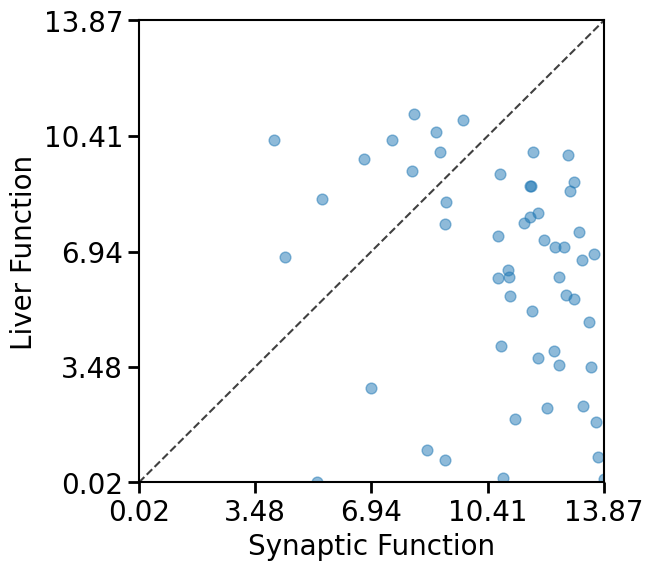

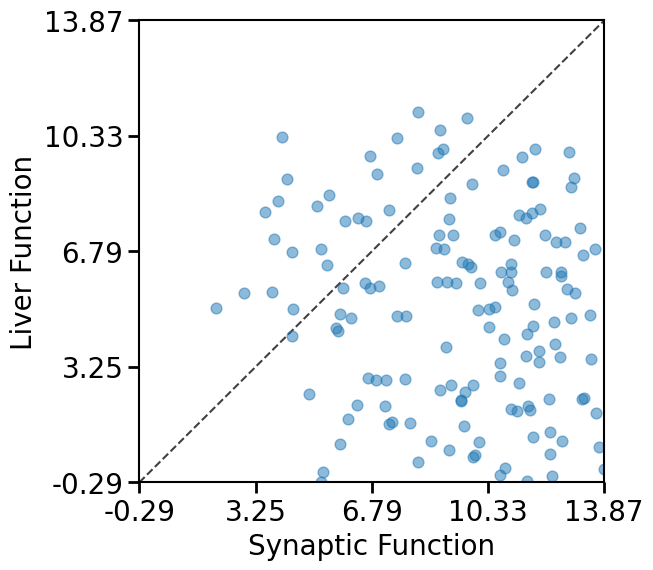

In [9]:
Y_real_opts, X_real_opts = Exp_9_10.get_optim()

# Parse the optimum into a table
data_opt = io.np_to_dataframe([X_real_opts, Y_real_opts], var_names)
display(data_opt.round(decimals=2))

# Choose outputs to plot
var1 = 4
var2 = 8

# Make the Pareto front
plotting.pareto_front(Y_real_opts[:, var1], Y_real_opts[:, var2], Y_names=[Y_name_list[var1],Y_name_list[var2]], fill=False)

# All sampling points
plotting.pareto_front(Exp_9_10.Y_real[:, var1], Exp_9_10.Y_real[:, var2], Y_names=[Y_name_list[var1],Y_name_list[var2]], fill=False)

In [31]:
# (Standardized) model prediction errors when looking at 45 known compounds:
from nextorch.utils import standardize_X
pred_out = Exp_9_10.predict_real(
    utils.real_to_encode_ParameterSpace(input_data_array, Exp_9_10.parameter_space))
real_out = bi.compute_biomarkers(input_data_array)
pd.DataFrame(utils.standardize_X(pred_out-real_out, X_mean=Exp_9_10.Y_mean, X_std=Exp_9_10.Y_std))

,0,1,2,3,4,5,6,7,8,9
0,-1.233307,-1.543340,-1.974004,-8.634566,-0.743176,-0.993821,-0.511417,-2.464986,-1.148526,-1.646838
1,-1.175693,-1.634486,-2.236381,-0.706909,-1.260542,-0.731517,-0.708643,-2.498868,-1.178124,-0.274904
2,-1.159784,-1.598332,-2.179889,-1.254435,-1.167780,-1.010323,-0.707576,-2.485226,-1.145880,-0.619077
3,-1.280194,-1.608606,-2.221988,-1.630641,-1.060483,-1.228227,-0.678940,-2.529695,-1.219449,-0.851702
4,-1.861297,-2.506479,-3.072838,-1.009268,-1.537979,-1.136478,-0.720201,-3.305661,-1.432450,-1.285260
5,-1.104080,-1.390355,-1.761135,-7.038548,-0.751377,-0.063164,-0.405302,-2.279787,-1.044172,-0.854983
6,-1.578030,-2.042518,-2.626569,-1.810143,-1.150768,0.168439,-0.687735,-2.918549,-1.364516,-1.087269
7,-1.141903,-1.462342,-2.034403,-0.713055,-1.143686,-0.959062,-0.661669,-2.340068,-1.088376,-0.239626
8,-0.926157,-1.532323,-1.975527,-1.589213,-0.953246,-0.846460,-0.507524,-2.437647,-1.360433,-0.699600
9,-0.740906,-1.214429,-1.716404,-1.765175,-0.986946,0.030081,-0.487253,-2.170810,-1.260458,-1.226501


In [32]:
pd.DataFrame(utils.standardize_X(pred_out-real_out, X_mean=Exp_9_10.Y_mean, X_std=Exp_9_10.Y_std), columns=Y_name_list).sum()

Inflammatory Response     -59.234299
Oxidative Stress          -81.016098
Neuroprotection          -104.161919
Mitochondrial Function   -156.432983
Synaptic Function         -48.113438
Motor Function            -25.725248
Cognitive Function        -29.214760
Cardiac Function         -121.114769
Liver Function            -58.590584
Kidney Function           -48.226524
dtype: float32